In [1]:
# load train data
import pandas as pd
train = pd.read_csv(r'E:\project_excelr\train (1).csv')

In [2]:
train.skew(axis=0, skipna=True)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [3]:
# load test data
test = pd.read_csv(r'E:\project_excelr\test (1).csv')

In [4]:
test.skew(axis=0, skipna=True)

ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.223512
Loan_Amount_Term    -2.679318
Credit_History      -1.722379
dtype: float64

In [5]:
# combine train and test data :
data = train.append(test)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# null imputation for categorical features :
data["Gender"] = data["Gender"].fillna('Male')
data["Married"] = data["Married"].fillna('Yes')
data["Dependents"] = data["Dependents"].fillna(0)
data["Self_Employed"] = data["Self_Employed"].fillna('No')
data["Credit_History"] = data["Credit_History"].fillna(1.0)


In [7]:
# # null imputation for numerical feeature :
median = data["LoanAmount"].median()
mode = data["Loan_Amount_Term"].mode()
data["LoanAmount"] = data["LoanAmount"].fillna(median)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(360.0)
# mode
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

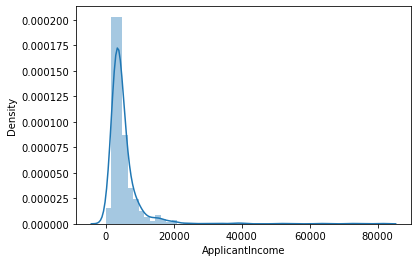

In [8]:
# distribution on applicantincome feature :
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.distplot(data.ApplicantIncome)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

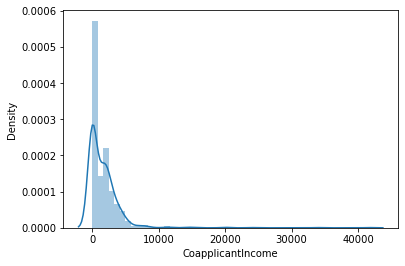

In [9]:
# Distribution of CoapplicantIncome :
sns.distplot(data.CoapplicantIncome)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

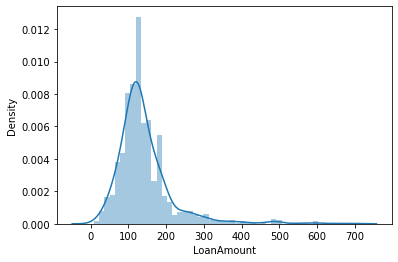

In [80]:
# distribution of LoanAmount feature :
sns.distplot(data.LoanAmount)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

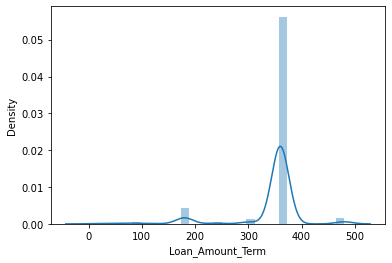

In [81]:
# distribution of Loan_Amount_Term feature :
sns.distplot(data.Loan_Amount_Term)

In [10]:
# adding applicantincome and coapplicantincome feature :

data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data = data.drop(["ApplicantIncome", "CoapplicantIncome"], axis=1)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

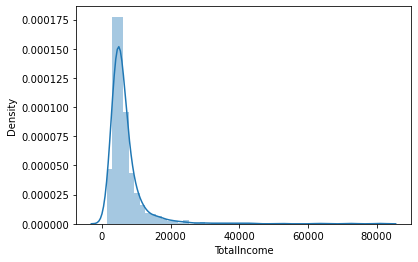

In [11]:
# distribution of TotalIncome feature :
sns.distplot(data.TotalIncome)

In [12]:
# to combine LoanAmount and Loan_Amount_Term feature we need to calculate EMI and for that we have to assume interest rate of 7.5 %
r = 7.5
p = data["LoanAmount"]
n = data["Loan_Amount_Term"]

# unit for emi will be amount should be repay per month (amount/month):
emi = (p*r*(1+r)*n)/((1+r)*n - 1)
data["EMI"] = pd.Series(emi)

# drop unneccessary feature :
data = data.drop("Loan_Amount_Term", axis=1)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

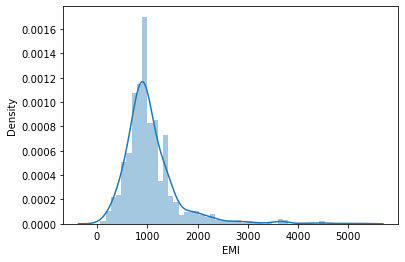

In [13]:
# distribution of EMI feature :
sns.distplot(data.EMI)

In [14]:
# to make data more intiutive we take Capacity feature which defines applicant' capacity that he/she will be able to rapay loan.

data["Capacity"] = (1 - (data.LoanAmount/data.TotalIncome))*100

<AxesSubplot:>

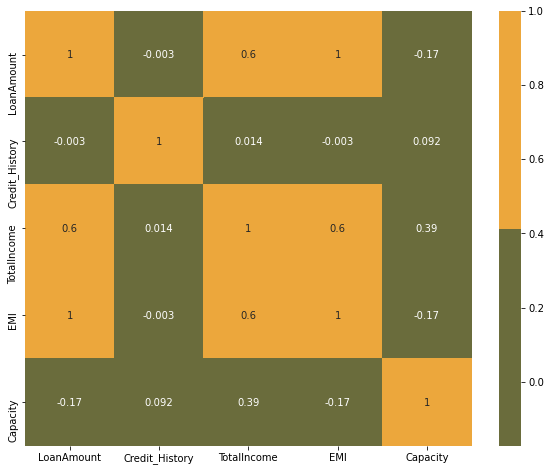

In [15]:
# Correlation using Heatmap :
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap = sns.color_palette(["#6a6c3c", "#eca73c"]), ax=ax)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capacity', ylabel='Density'>

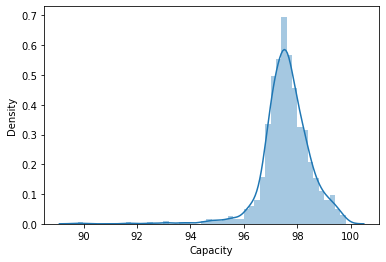

In [16]:
# distribution of Capacity feature :
sns.distplot(data.Capacity)

In [89]:
# Making function to visulize approval of loan status using bar chart :
def bar_chart(feature):
    approved = train[train["Loan_Status"] == "Y"][feature].value_counts()
    not_approved = train[train["Loan_Status"] == "N"][feature].value_counts()
    df = pd.DataFrame([approved, not_approved])
    df.index = ["Approved", "Not_approved"]
    df.plot(kind="bar", stacked=True, figsize=(10,6))
    plt.xlabel(feature)

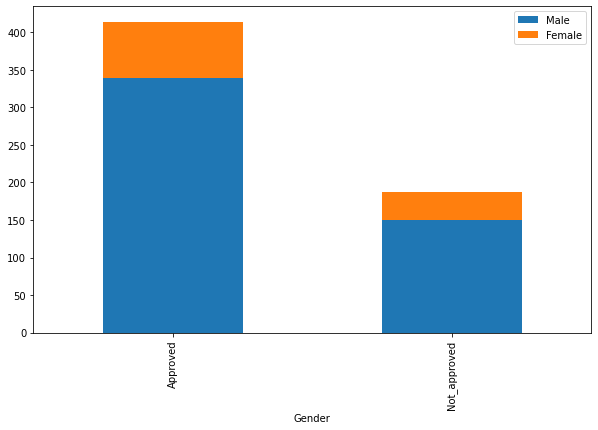

In [90]:
# bar chart for gender feature :
bar_chart("Gender")

From above, Male applicant is more then Female applicant.

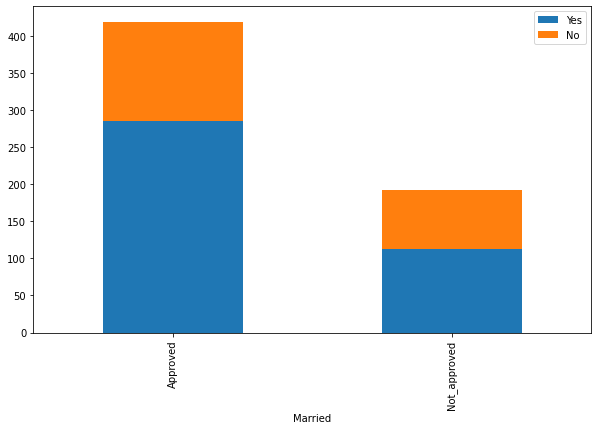

In [91]:
# bar chart for Married feature :
bar_chart("Married")

From above, Married applicant is more than unmarried applicants, so its obvious that married will apply more than of unmarried as it has higher responsibility and dependents as compare to unmarried.

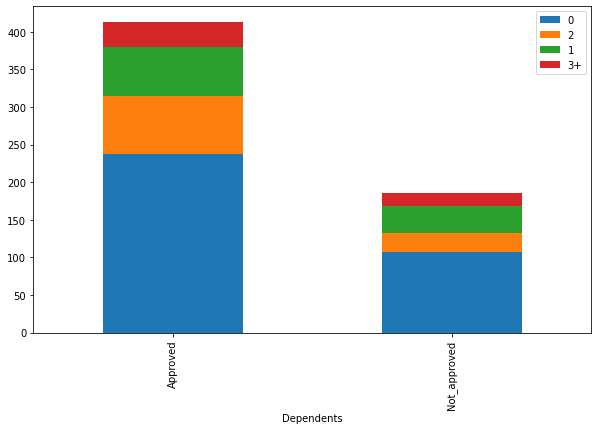

In [92]:
# bar chart for Dependents feeature :
bar_chart("Dependents")

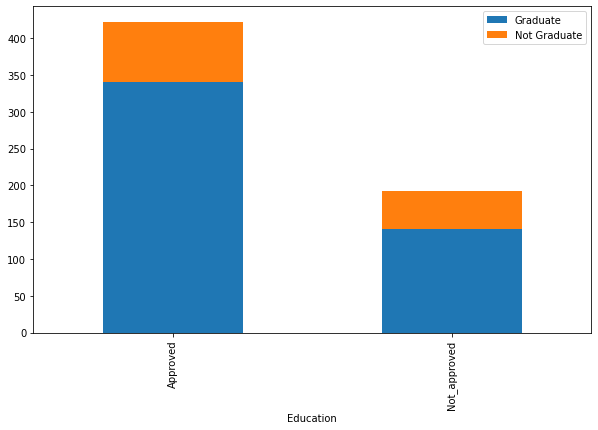

In [93]:
# bar chart for Education feature :
bar_chart("Education")

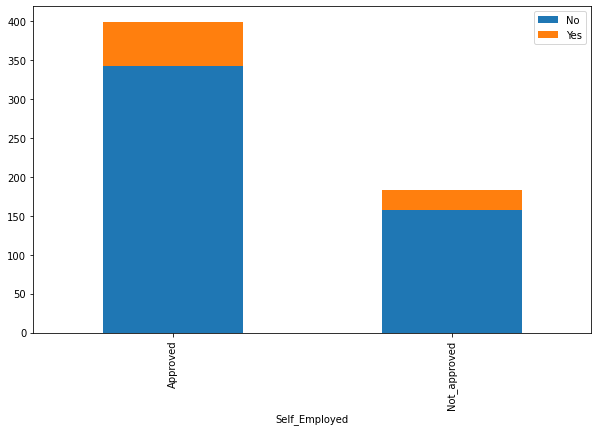

In [94]:
# bar chart for Self_Employed feature :
bar_chart("Self_Employed")

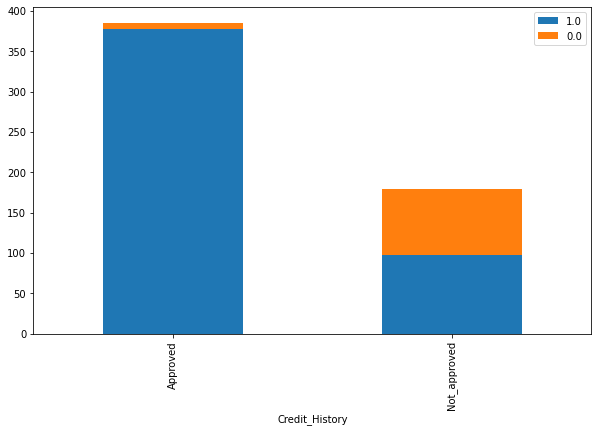

In [95]:
# bar chart for Credit_History feature :
bar_chart("Credit_History")

Here we can observe that applicant with previous credit history will more likely to get loan approval

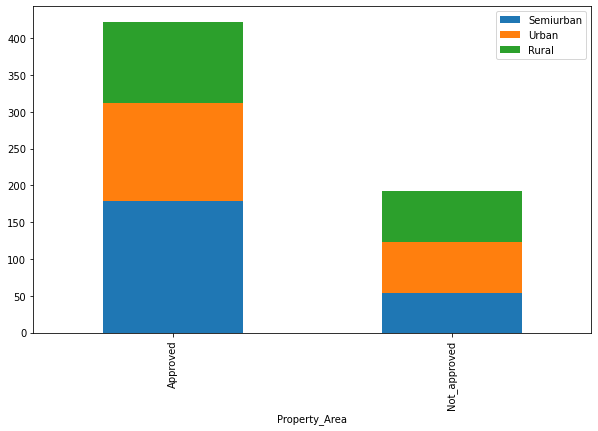

In [96]:
# bar chart for Property_Area :
bar_chart("Property_Area")

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

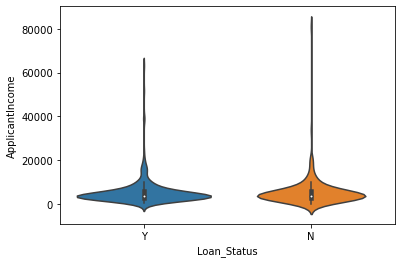

In [97]:
# BIVARIATE ANALYSIS :
sns.violinplot(x="Loan_Status", y="ApplicantIncome", data=train, size=20, alpha=0.1)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

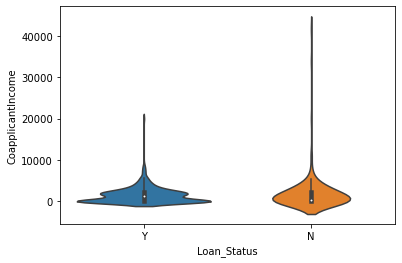

In [98]:
sns.violinplot(x="Loan_Status", y="CoapplicantIncome", data=train, size=20, alpha=0.1)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

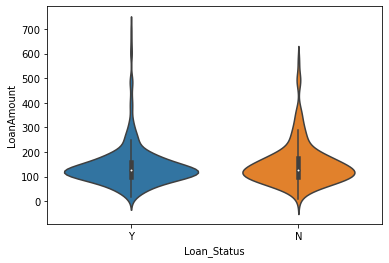

In [99]:
sns.violinplot(x="Loan_Status", y="LoanAmount", data=train, size=20, alpha=0.1)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

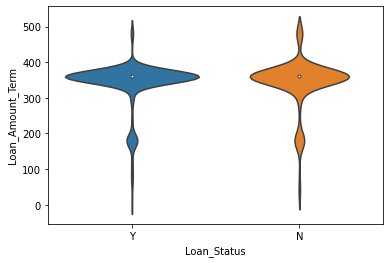

In [100]:
sns.violinplot(x="Loan_Status", y="Loan_Amount_Term", data=train, size=20, alpha=0.1)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


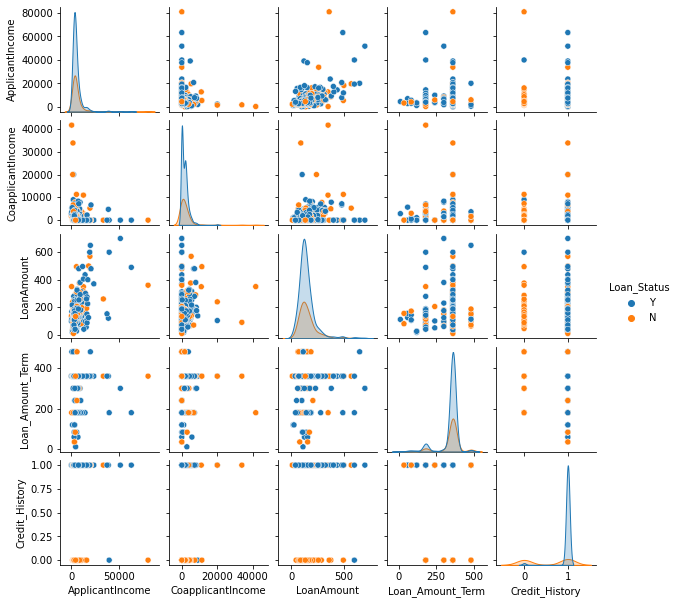

In [101]:
sns.pairplot(train, hue="Loan_Status", size=1.7)

In [17]:
# convert categorical feature into numerical using .get_dummies :
clean_data = data.drop("Loan_ID", axis=1)
clean_data = clean_data.drop("Loan_Status", axis=1)
categorical = [var for var in clean_data.columns if clean_data[var].dtype == 'O']
cat_clean_data = clean_data[categorical]
final_data = pd.get_dummies(cat_clean_data)
final_data[["LoanAmount","TotalIncome", "EMI", "Capacity"]] = clean_data[["LoanAmount","TotalIncome", "EMI", "Capacity"]]
ch = pd.DataFrame(pd.get_dummies(clean_data["Credit_History"]))
final_data[ch.columns] = ch[ch.columns]
final_data = final_data.rename({0.0 : 'Credit_History_0', 1.0 : "Credit_History_1"}, axis=1)
col = [a for a in range(final_data.shape[1])]
col.remove(4)
final_data = final_data.iloc[:,col]


In [18]:
import numpy as np
# to make distribution normal of feature we applies Log transformation :
final_data["LoanAmount_log"] = np.log(final_data.LoanAmount)
final_data = final_data.drop("LoanAmount", axis=1)
final_data["TotalIncome_log"] = np.log(final_data.TotalIncome)
final_data = final_data.drop("TotalIncome", axis=1)
final_data["EMI_log"] = np.log(final_data.EMI)
final_data = final_data.drop("EMI", axis=1)
final_data.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Capacity,Credit_History_0,Credit_History_1,LoanAmount_log,TotalIncome_log,EMI_log
0,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,97.845786,0,1,4.836282,8.674026,6.851512
1,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,97.898539,0,1,4.852030,8.714568,6.867260
2,0,1,0,1,1,0,0,0,1,0,...,1,0,0,1,97.800000,0,1,4.189655,8.006368,6.204885
3,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,97.571342,0,1,4.787492,8.505323,6.802722
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,97.650000,0,1,4.948760,8.699515,6.963990


C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

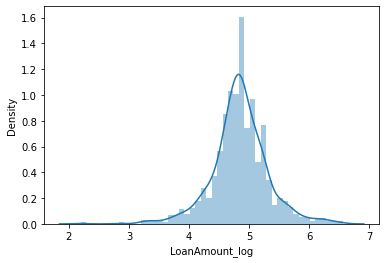

In [19]:
# distribution of LoanAmount_log feature :
sns.distplot(final_data.LoanAmount_log)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

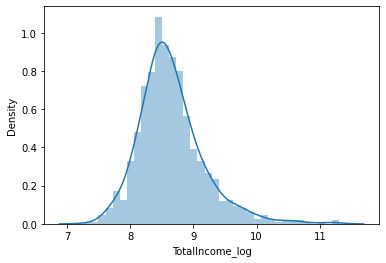

In [105]:
# distribution of TotalIncome_log feature :
sns.distplot(final_data.TotalIncome_log)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI_log', ylabel='Density'>

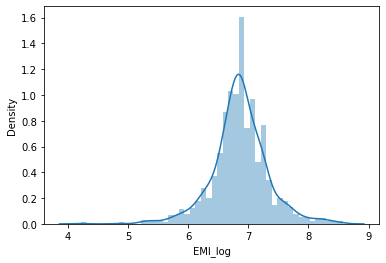

In [106]:
# distribution of EMI_log feature :
sns.distplot(final_data.EMI_log)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capacity', ylabel='Density'>

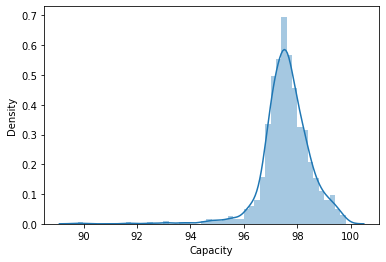

In [107]:
# distribution of Capacity feature :
sns.distplot(final_data.Capacity)

In [20]:
# split the data for training and testing
train_data = final_data.iloc[0:614,:]
test_data = final_data.iloc[614: , :]
train_data.shape , test_data.shape

((614, 21), (367, 21))

In [21]:
y = train["Loan_Status"]
y.shape

(614,)

In [22]:
# apply Oversampling Resampling Technique :
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [23]:
# Random over sampler technique :
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(train_data, y)

In [24]:
# make final_train_data after applying oversampling for better model preperation :
train_data = x_res
target = y_res
print("train_data :", train_data.shape)
print("target :", target.shape)
train_data.head()

train_data : (844, 21)
target : (844,)


,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Capacity,Credit_History_0,Credit_History_1,LoanAmount_log,TotalIncome_log,EMI_log
0,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,97.845786,0,1,4.836282,8.674026,6.851512
1,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,97.898539,0,1,4.852030,8.714568,6.867260
2,0,1,0,1,1,0,0,0,1,0,...,1,0,0,1,97.800000,0,1,4.189655,8.006368,6.204885
3,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,97.571342,0,1,4.787492,8.505323,6.802722
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,97.650000,0,1,4.948760,8.699515,6.963990


In [25]:
# train_data.to_csv('loan_train_data.csv')
# target.to_csv('loan_target.csv')

<AxesSubplot:>

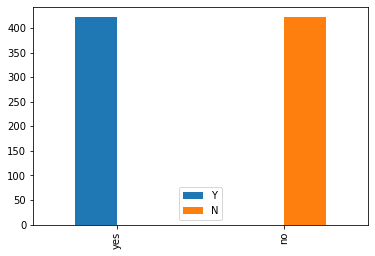

In [113]:
# checking if still data is imbalanced or not :
yes = target.loc[target == "Y" ].value_counts()
no = target.loc[target == "N" ].value_counts()
df = pd.DataFrame([yes, no])
df.index = ["yes", "no"]
df.plot(kind="bar")

In [16]:
# # fina best parameter using GridSearchCV :
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV , train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, random_state=7)
# model = LogisticRegression()
# param_grid = {'C' : [100, 10, 1.0, 0.1, 0.01],
#               'penalty' : ['l1','l2', 'elasticnet'],
#               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'class_weight' : [0.01, 1, 100]
#               }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
# # grid_search.fit(x_train, y_train)

In [114]:
# Import modules to perform different Algorithm on dataset :

# Below Parameters has been derived using GridSearchCV validation technique :
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
log = LogisticRegression(C=0.01, class_weight=0.01, solver='newton-cg')
ran = RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=300)
svm = SVC(C=10, gamma=1, probability=True)
mnb = MultinomialNB(alpha=0.1)
sgd = GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=500,subsample=0.7)
tree_model = DecisionTreeClassifier(max_depth=17.0, max_features=9, min_samples_leaf=0.1,min_samples_split=0.1)
knn = KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=39, weights='distance')
etc = ExtraTreesClassifier(max_features=5, min_samples_leaf=20, min_samples_split=30,n_estimators=300)
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
bag = BaggingClassifier(n_estimators=1000)

In [115]:
# Make apply function which directly applies algorithm to model and checks parameters :
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
def apply(model):
    le = LabelEncoder()
    x_train, x_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, random_state=7)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_new = le.fit_transform(y_test)
    y_pred_new = le.fit_transform(y_pred)
    print("Training accuracy :", model.score(x_train, y_train))
    print("Accuracy :", model.score(x_test, y_test))
    score = cross_val_score(model, train_data, target, cv=5)
    print("Validation score :", score.mean())
    print("Loss :", log_loss(y_new, y_pred_new))

In [46]:
# logistic regression :
apply(log)

Training accuracy : 0.7779661016949152
Accuracy : 0.7677165354330708
Validation score : 0.7405043674274443
Loss : 8.022925155852988


In [47]:
# Random forest :
apply(ran)

Training accuracy : 1.0
Accuracy : 0.8779527559055118
Validation score : 0.8946252465483235
Loss : 4.215422285800808


In [48]:
# svm :
apply(svm)

Training accuracy : 0.9661016949152542
Accuracy : 0.8503937007874016
Validation score : 0.8353761622992393
Loss : 5.167281476201614


In [49]:
# multinomialnb :
apply(mnb)

Training accuracy : 0.7338983050847457
Accuracy : 0.7244094488188977
Validation score : 0.7179768948999717
Loss : 9.518720972884598


In [50]:
# Gradient Boosting Classifier :
apply(sgd)

Training accuracy : 1.0
Accuracy : 0.8661417322834646
Validation score : 0.8839391377852918
Loss : 4.6233637376990835


In [52]:
# Deicision tree :
apply(tree_model)

Training accuracy : 0.7627118644067796
Accuracy : 0.7401574803149606
Validation score : 0.6682445759368837
Loss : 8.974756014061384


[Text(422.72727272727275, 622.875, 'X[17] <= 0.5\ngini = 0.499\nsamples = 590\nvalue = [283, 307]\nclass = N'),
 Text(211.36363636363637, 509.625, 'X[19] <= 8.583\ngini = 0.09\nsamples = 127\nvalue = [121, 6]\nclass = Y'),
 Text(105.68181818181819, 396.375, 'gini = 0.06\nsamples = 65\nvalue = [63, 2]\nclass = Y'),
 Text(317.04545454545456, 396.375, 'gini = 0.121\nsamples = 62\nvalue = [58, 4]\nclass = Y'),
 Text(634.0909090909091, 509.625, 'X[15] <= 96.849\ngini = 0.455\nsamples = 463\nvalue = [162, 301]\nclass = N'),
 Text(528.409090909091, 396.375, 'gini = 0.468\nsamples = 59\nvalue = [37, 22]\nclass = Y'),
 Text(739.7727272727273, 396.375, 'X[13] <= 0.5\ngini = 0.427\nsamples = 404\nvalue = [125, 279]\nclass = N'),
 Text(528.409090909091, 283.125, 'X[19] <= 8.885\ngini = 0.475\nsamples = 263\nvalue = [102, 161]\nclass = N'),
 Text(422.72727272727275, 169.875, 'X[15] <= 97.555\ngini = 0.437\nsamples = 174\nvalue = [56, 118]\nclass = N'),
 Text(317.04545454545456, 56.625, 'gini = 0.28

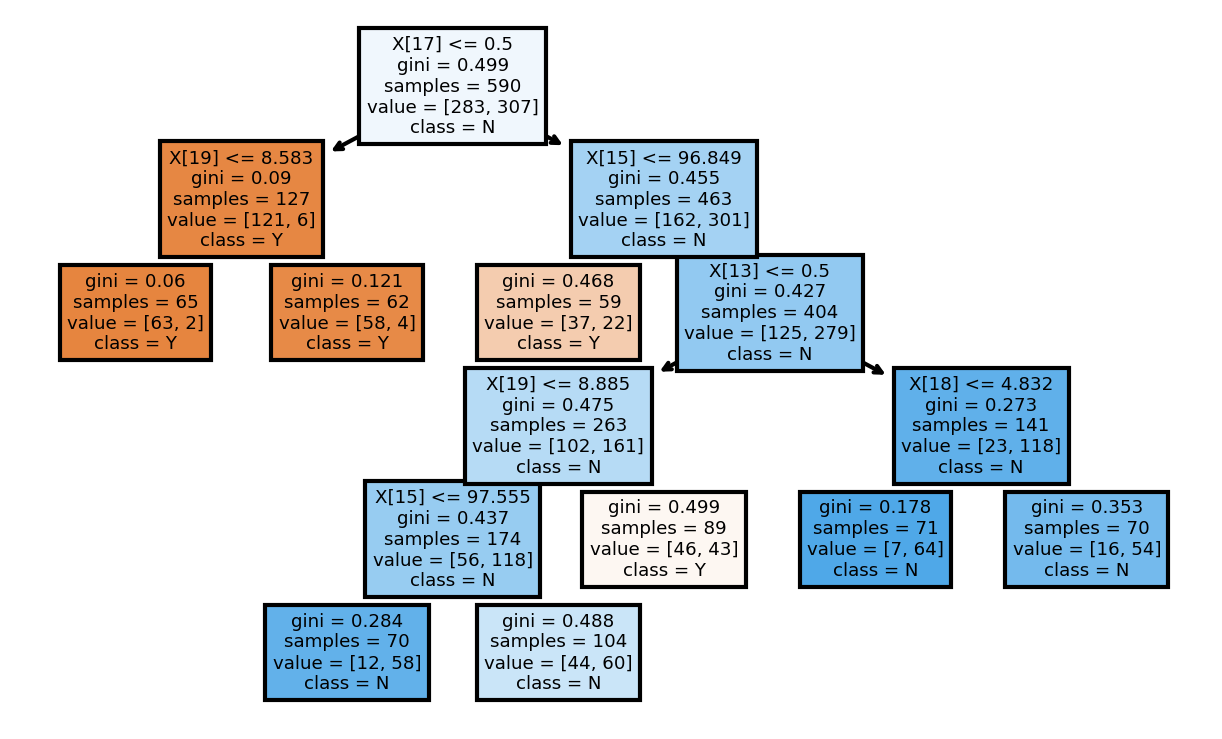

In [54]:
# Decision Tree visualisation :
from sklearn import tree
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, random_state=7)
tree_model = DecisionTreeClassifier(max_depth=17.0, max_features=9, min_samples_leaf=0.1,min_samples_split=0.1)
tree_model.fit(x_train, y_train)
cn = ['Y','N']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3), dpi=300)
tree.plot_tree(tree_model, class_names=cn, filled=True)

In [117]:
# Confusion matrix, classification Report using Logistic Regression :
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]
sensitivity = (tp/(tp+fn))*100
specificity = (tn/(tn+fp))*100
print("Sensitivity :", sensitivity)
print("Specificity :", specificity)
pred_proba = log.predict_proba(x_test)
# print("AUC :", roc_auc_score(y, pred_proba[:,1]))
mcc = (tp*tn - fp*fn) /((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5
print("MCC :", mcc)    

Sensitivity : 86.95652173913044
Specificity : 68.34532374100719
MCC : 0.5555438651800161


In [119]:
# Classification report ;
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.86      0.68      0.76       139
           Y       0.69      0.87      0.77       115

    accuracy                           0.77       254
   macro avg       0.78      0.78      0.77       254
weighted avg       0.79      0.77      0.77       254



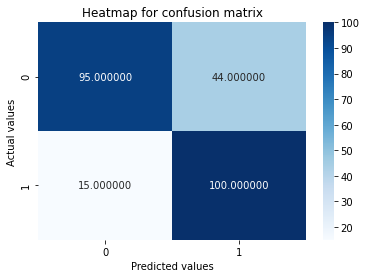

In [120]:
# Heatmap of Confusion Matrix :
sns.heatmap(cm, annot=True, cmap= "Blues", fmt="0f")
plt.title("Heatmap for confusion matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [55]:
# K-Nearest Neighbor
apply(knn)

Training accuracy : 1.0
Accuracy : 0.8818897637795275
Validation score : 0.9100239504085657
Loss : 4.079449147217932


In [68]:
# Extra Tree Classifier :
apply(etc)

Training accuracy : 0.752542372881356
Accuracy : 0.7401574803149606
Validation score : 0.7334319526627219
Loss : 8.974790642296552


In [69]:
# XGBoost :
apply(xgb)

C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy : 0.9864406779661017
Accuracy : 0.8503937007874016
[09:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation score : 0.8436460974922515
Loss : 5.167290920265749


In [70]:
# Bagging Classifier :
apply(bag)

Training accuracy : 1.0
Accuracy : 0.8661417322834646
Validation score : 0.888665821358129
Loss : 4.623357441656327


In [32]:
bag.fit(x_train, y_train)
bag.score(x_test, y_test)

0.8661417322834646

In [33]:
model = BaggingClassifier()
model.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
# model = BaggingClassifier()
# param_grid = {"n_estimators" : [10,100,300,500,1000]}
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
# grid_search.fit(x_train, y_train)

In [35]:
# grid_search.best_estimator_

In [36]:
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss
# y_pred = best_model.predict(train_data)
# cm = confusion_matrix(target, y_pred)
# tn = cm[0,0]
# fp = cm[0,1]
# fn = cm[1,0]
# tp = cm[1,1]
# sensitivity = (tp/(tp+fn))*100
# specificity = (tn/(tn+fp))*100
# print("Sensitivity :", sensitivity)
# print("Specificity :", specificity)
# pred_proba = best_model.predict_proba(train_data)
# print("AUC :", roc_auc_score(target, pred_proba[:,1]))
# mcc = (tp*tn - fp*fn) /((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5
# print("MCC :", mcc)    


In [37]:
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

In [38]:
# Apply LabelEncodding to find Loss :
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)

In [39]:
print("Loss :", log_loss(y_new, y_pred_new))

Loss : 8.022925155852988


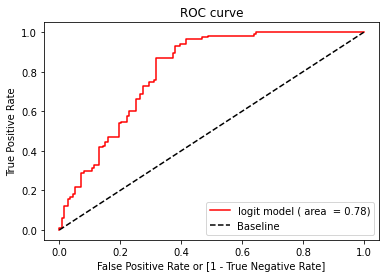

In [40]:
# ROC curve for Logistic Regression :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_new, log.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

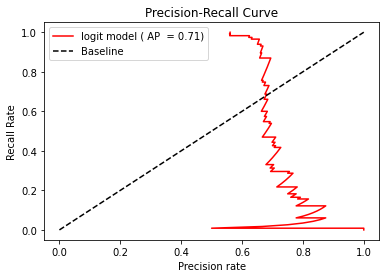

In [41]:
# precision-recall curve for Logistic Regression :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, log.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='logit model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall Curve')
plt.legend()

In [44]:
# parameter visualization of ETC :
etc.fit(x_train, y_train)
y_pred = etc.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))

Loss : 8.974790642296552


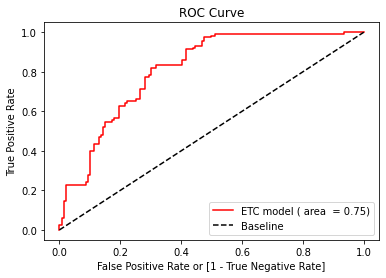

In [45]:
# ROC curve for ETC
fpr, tpr, thresholds = roc_curve(y_new, etc.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='ETC model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

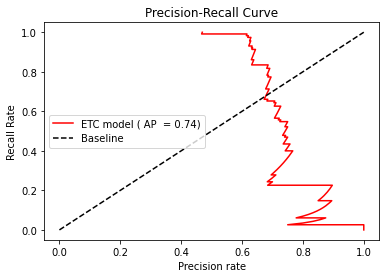

In [46]:
# precision-recall curve for ETC :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, etc.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='ETC model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall Curve')
plt.legend()

Loss : 3.943463416549542


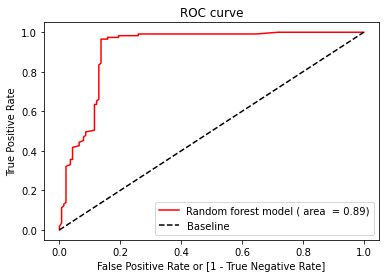

In [47]:
# parameter visualization of Random forest :
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))
# ROC curve for Random forest :
fpr, tpr, thresholds = roc_curve(y_new, ran.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='Random forest model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


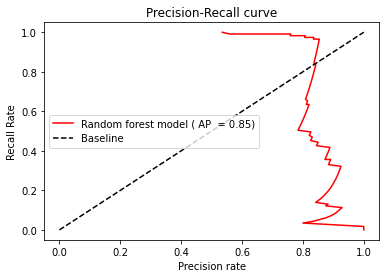

In [48]:
# precision-recall curve for Random Forest :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, ran.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='Random forest model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall curve')
plt.legend()

Loss : 5.167281476201614


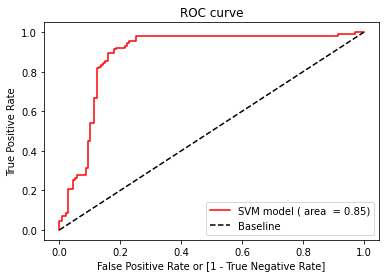

In [49]:
# parameter visualization of svm :
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))
# ROC curve for svm :
fpr, tpr, thresholds = roc_curve(y_new, svm.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='SVM model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


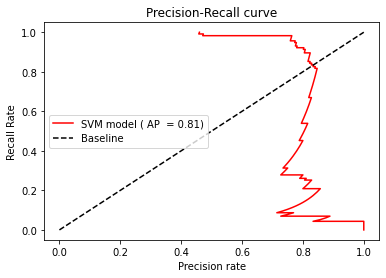

In [50]:
# precision-recall curve for SVM :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, svm.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='SVM model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall curve')
plt.legend()

Loss : 9.518720972884598


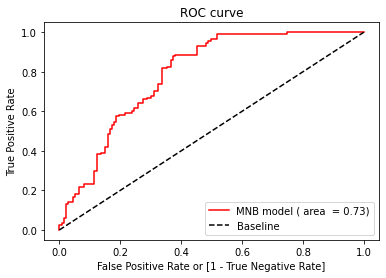

In [51]:
# parameter visualization of mnb :
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))
# ROC curve for mnb :
fpr, tpr, thresholds = roc_curve(y_new, mnb.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='MNB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


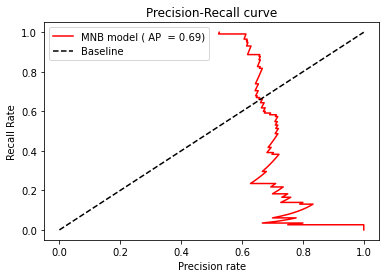

In [52]:
# precision-recall curve for MNB :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, mnb.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='MNB model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall curve')
plt.legend()

Loss : 13.326148290423689


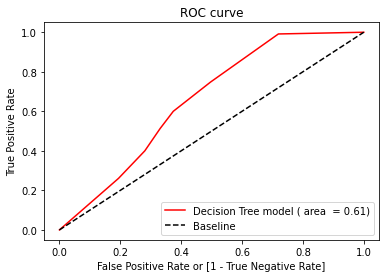

In [55]:
# parameter visualization of Decision Tree :
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))
# ROC curve for Decision Tree :
fpr, tpr, thresholds = roc_curve(y_new, tree_model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='Decision Tree model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


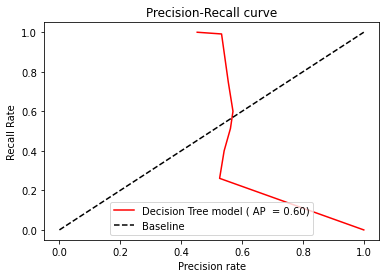

In [56]:
# precision-recall curve for Decision Tree :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, tree_model.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='Decision Tree model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall curve')
plt.legend()

Loss : 4.487378007030694


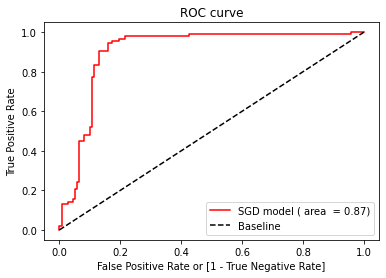

In [57]:
# parameter visualization of SGD :
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))
# ROC curve for SGD :
fpr, tpr, thresholds = roc_curve(y_new, sgd.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='SGD model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


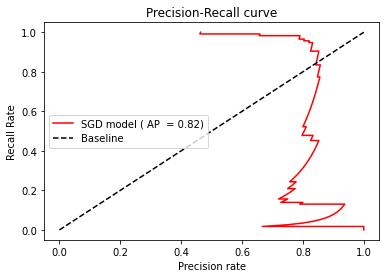

In [58]:
# precision-recall curve for SGD :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, sgd.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='SGD model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall curve')
plt.legend()

Loss : 4.079449147217932


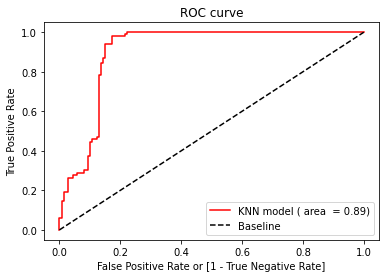

In [59]:
# parameter visualization of knn :
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))
# ROC curve for knn :
fpr, tpr, thresholds = roc_curve(y_new, knn.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='KNN model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


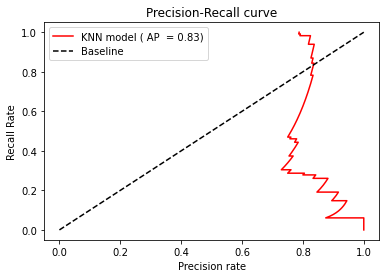

In [60]:
# precision-recall curve for KNN :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, knn.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='KNN model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall curve')
plt.legend()

C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Loss : 5.167290920265749


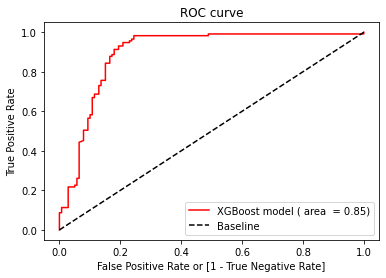

In [61]:
# parameter visualization of XGboost :
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))
# ROC curve for XGBoost :
fpr, tpr, thresholds = roc_curve(y_new, xgb.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='XGBoost model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


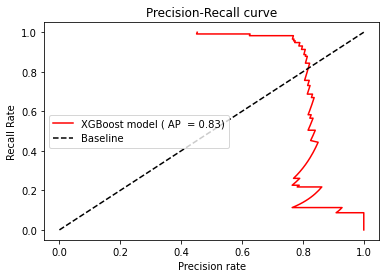

In [62]:
# precision-recall curve for XGBoost :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, xgb.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='XGBoost model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall curve')
plt.legend()

Loss : 4.35140172042644


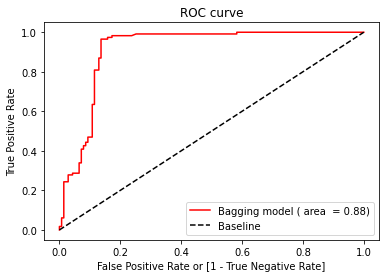

In [63]:
# parameter visualization of Bagging :
bag.fit(x_train, y_train)
y_pred = bag.predict(x_test)
y_new = le.fit_transform(y_test)
y_pred_new = le.fit_transform(y_pred)
print("Loss :", log_loss(y_new, y_pred_new))
# ROC curve for Bagging :
fpr, tpr, thresholds = roc_curve(y_new, bag.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_new, y_pred_new)

plt.plot(fpr, tpr, color='red', label='Bagging model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


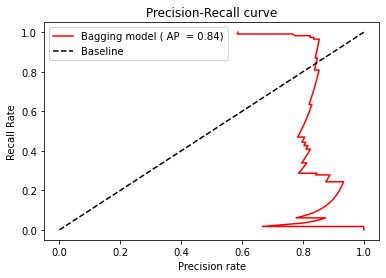

In [64]:
# precision-recall curve for Bagging :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_new, bag.predict_proba (x_test)[:,1])
ap = auc(recall, precision)
auc = roc_auc_score(y_new, y_pred_new)
plt.plot(precision, recall, color='red', label='Bagging model ( AP  = %0.2f)'%ap)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Precision rate')
plt.ylabel('Recall Rate')
plt.title('Precision-Recall curve')
plt.legend()

In [116]:
# Apply PCA on test_data to visualise class distribution using different algorithms :
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_test)
# make dataframe of pc values :
pca_df = pd.DataFrame(pca_data)
# pca_df.head()
# give columns name to pca dataframe :
pca_df.columns = ["pc1", "pc2"]
# pca_df.head()
# Load target variable into pca_df :
pca_df["Loan_Status"] = pd.Series(y)
# pca_df.head()
y_pred_ran = ran.predict(x_test)
y_pred_log = log.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_mnb = mnb.predict(x_test)
y_pred_sgd = sgd.predict(x_test)
y_pred_tree = tree_model.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_etc = etc.predict(x_test)
y_pred_xgb = xgb.predict(x_test)
y_pred_bag = bag.predict(x_test)
pca_df["y_pred_ran"] = pd.Series(y_pred_ran)
pca_df["y_pred_log"] = pd.Series(y_pred_log)
pca_df["y_pred_svm"] = pd.Series(y_pred_svm)
pca_df["y_pred_mnb"] = pd.Series(y_pred_mnb)
pca_df["y_pred_sgd"] = pd.Series(y_pred_sgd)
pca_df["y_pred_tree"] = pd.Series(y_pred_tree)
pca_df["y_pred_knn"] = pd.Series(y_pred_knn)
pca_df["y_pred_etc"] = pd.Series(y_pred_etc)
pca_df["y_pred_xgb"] = pd.Series(y_pred_xgb)
pca_df["y_pred_bag"] = pd.Series(y_pred_bag)
pca_df.head()

,pc1,pc2,Loan_Status,y_pred_ran,y_pred_log,y_pred_svm,y_pred_mnb,y_pred_sgd,y_pred_tree,y_pred_knn,y_pred_etc,y_pred_xgb,y_pred_bag
0,0.885050,-1.114115,Y,N,N,N,N,N,N,N,N,N,N
1,-0.657452,0.112031,N,N,Y,N,Y,N,Y,N,Y,N,N
2,0.581752,2.194636,Y,N,Y,N,N,N,N,N,N,N,N
3,0.773233,0.895053,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
4,0.838731,0.661768,Y,N,N,N,N,N,N,N,N,N,N


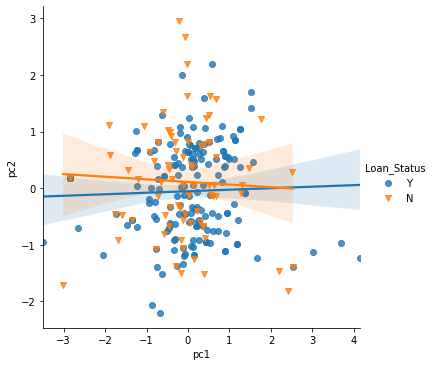

In [66]:
# Original test data visualisation :
import seaborn as sns
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='Loan_Status', markers=['o','v'])

Text(0.5, 1.0, 'Class Distribution')

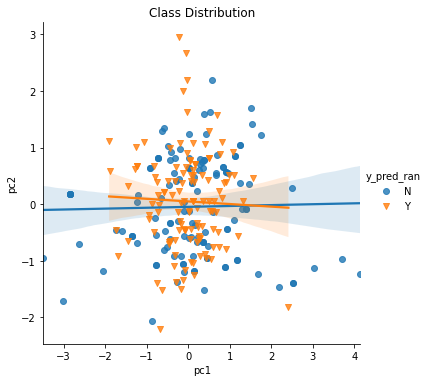

In [67]:
# Random forest fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_ran', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

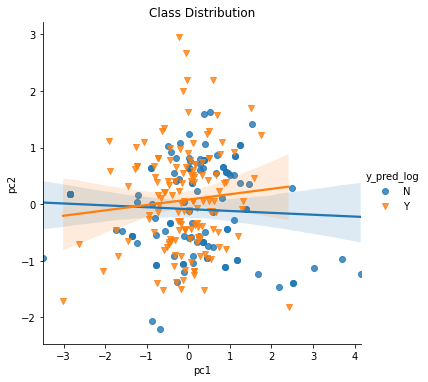

In [68]:
# Logistic Regression fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_log', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

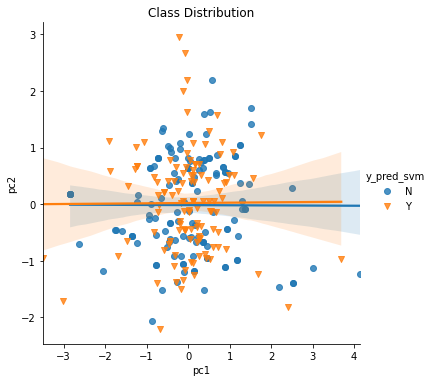

In [69]:
# svm fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_svm', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

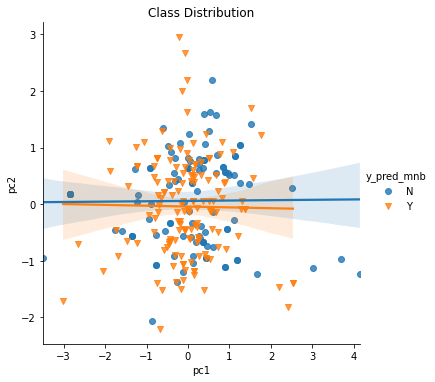

In [70]:
# mnb fitting visualisation : 
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_mnb', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

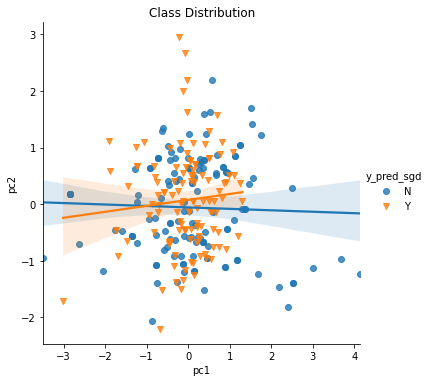

In [71]:
# SGD fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_sgd', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

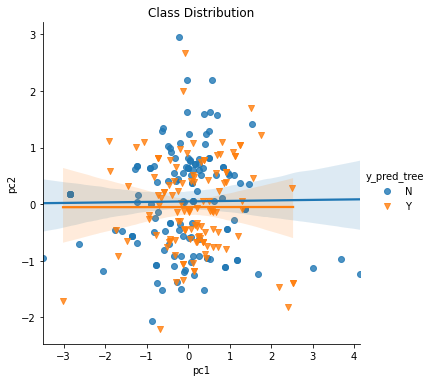

In [117]:
# Decision Tree fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_tree', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

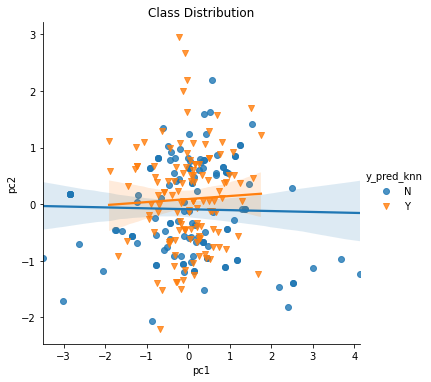

In [73]:
# KNN fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_knn', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

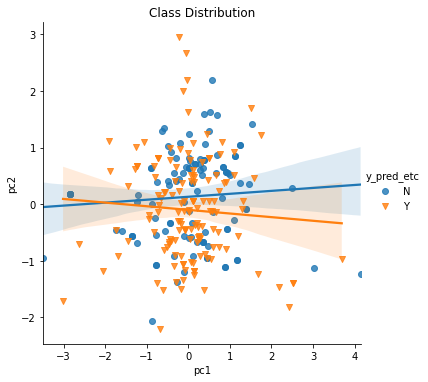

In [74]:
# ETC fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_etc', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

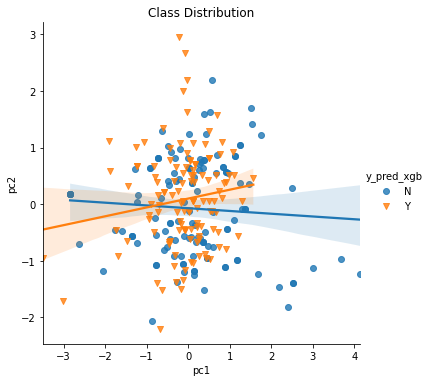

In [75]:
# XGB fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_xgb', markers=['o','v'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Class Distribution')

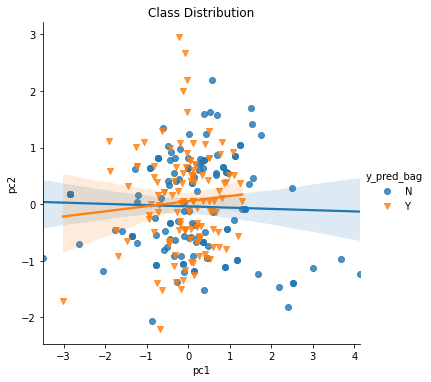

In [76]:
# BAG fitting visualisation :
sns.lmplot(x = 'pc1', y = 'pc2', data=pca_df, hue='y_pred_bag', markers=['o','v'])
plt.title('Class Distribution')

In [118]:
y_pred = etc.predict(test_data)
submission_df = pd.DataFrame()
submission_df["Loan_ID"] = test.Loan_ID
submission_df["Loan_Status"] = pd.Series(y_pred)
submission_df.index = test.Loan_ID
submission_df = submission_df.drop("Loan_ID", axis=1)
submission_df.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


In [ ]:
# submission_df.to_csv('G6_submission_with_etc.csv')

In [ ]:
# model evaluation parameters :
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss
ran.fit(x_train, y_train)
y_pred = etc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]
sensitivity = (tp/(tp+fn))*100
specificity = (tn/(tn+fp))*100
print("Sensitivity :", sensitivity)
print("Specificity :", specificity)
mcc = (tp*tn - fp*fn) /((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5
print("MCC :", mcc)    
